# Método de Newton aplicado à função Rosenbrock

Este algoritmo aplica o método de otimização Steepest descent à função matemática de Rosenbrock, a qual é definida pela equação geral:

\begin{equation}
f(x,y) = (a - x)^2 + b(y - x^2)^2 ,
\end{equation}

onde $a$ e $b$ são constantes e o mínimo dessa função é $(x,y)=(a,a^2)$, onde $f(a,a^2)=0$. Normalmente $a$ e $b$ são iguais a 1 e a 100, respectivamente, nesse caso, o mínimo dessa função é $(x,y)=(1,1)$.

Então a função a ser minimizada através do método steepest descente é:

\begin{equation}
f(p_1,p_2) = 100(p_2 - p_1^2)^2 + (p_1 - 1)^2 ,
\end{equation}

A proposta do código é encontrar o mínimo da função através de muitas iterações.

O método de Newton é um método de gradiente aceitável, o qual expande a função objetivo em série de Taylor até segunda ordem em torno de $\mathbf{p}_i$:

\begin{equation}
\phi(\mathbf{p}) = \phi(\mathbf{p}_i) + \mathbf{J}_i^T(\mathbf{p} - \mathbf{p}_i) + \frac{1}{2}(\mathbf{p} - \mathbf{p}_i)^T\mathbf{H}_i(\mathbf{p} - \mathbf{p}_i)
\end{equation}

onde $\mathbf{J} = \boldsymbol{\nabla}_{\mathbf{p}}\phi |_{\mathbf{p} =\mathbf{p}_i}$ e $\mathbf{H} = \boldsymbol{\nabla}_{\mathbf{p}}\boldsymbol{\nabla}_{\mathbf{p}}^T\phi|_{\mathbf{p} =\mathbf{p}_i}$ .

Todo método de gradiente aceitável é definido pela equação:

\begin{equation}
\mathbf{p}_{i+1} = \mathbf{p}_i - \rho_i \mathbf{R}_i\mathbf{J}_i
\end{equation}

No método de Newton $\rho_i = 1$ e $\mathbf{R}_i = \mathbf{H}^{-1}_i$. Seu algoritmo fica:

1) estabelece um chute inicial $\mathbf{p}_i$

2) calcula $\mathbf{J}_i$ e $\mathbf{H}_i$

3) calcula $\mathbf{p}_{i+1} = \mathbf{p}_i - \mathbf{H}_i^{-1} \mathbf{J}_i$
 
4) testa a convergência, se for satisfeita o algoritmo para, caso contrário retorna para 1)

# Importando pacotes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, ticker
from visual import histeq

## Plotando a função

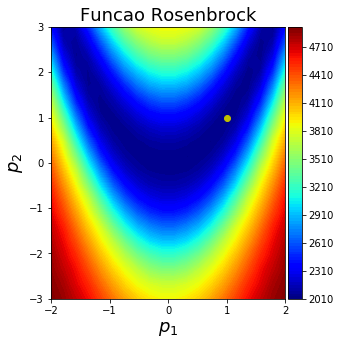

In [2]:
#definindo os parâmetros
p1 = np.linspace(-2., 2., 20)
p2 = np.linspace(-3., 3., 20)

#criando um grid
p1, p2 = np.meshgrid(p1, p2)

# calculando a phi
phi = 100.*(p2 - p1*p1)*(p2 - p1*p1) + (p1 - 1)*(p1 - 1)

# equalizando as cores
phi_eq = histeq(phi)
phi_eq = np.reshape(phi_eq,(20,20))

#plot
plt.figure(figsize=(5,5))
plt.plot(1., 1., 'oy')
plt.title('Funcao Rosenbrock', fontsize=18)
plt.contourf(p1, p2, phi_eq, 100, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
#plt.savefig('plot_rosenbrock.png', pad_inches=0.0)
plt.show()


# Funções

In [6]:
# calculando a phi
def rosenbrock(p0):
    '''
    Calcula a função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    phi: array 1D - valor da função calculada em cada ponto (p1, p2)
    '''
    phi = 100.*(p0[1] - p0[0]*p0[0])*(p0[1] - p0[0]*p0[0]) + (p0[0] - 1.)*(p0[0] - 1.)
    
    return phi

# calculando gradiente de phi
def grad_rosenbrock(p0):
    '''
    Calcula o gradiente da função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    grad: array 1D - vetor gradiente calculado em cada ponto (p1, p2)
    '''
    grad = np.zeros(2)
    grad[0] = -400.*p0[0]*(p0[1] - p0[0]*p0[0]) + 2.*(p0[0] - 1.) 
    grad[1] = 200.*(p0[1] - p0[0]*p0[0])

    return grad

# calculando a hessiana de phi
def hessian_rosenbrock(p0):
    '''
    Calcula a Hessiana da função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    Hessiana: array 2D - matriz Hessiana calculada em cada ponto (p1, p2)
    '''
    H = np.zeros((2,2))
    H[0,0] = 400.*(3*p0[0]*p0[0] - p0[1]) + 2.
    H[1,1] = 200.
    H[0,1] = -400.*p0[0]
    H[1,0] = H[0,1]
    
    return H

In [9]:
# chute inicial
p01 = -1.
p02 = 3.

# vetor de parâmetros inicial
p0 = np.array([p01,p02]) 

# valor da função no chute inicial
phi0 = rosenbrock(p0)

# armazenando o chute inicial
p1_list = [p01]
p2_list = [p02]
phi_list = [phi0]

# número de iteração máximo
itmax = 100

# critério de parada
epsilon = 1e-2

In [10]:
for i in range(itmax):
    # calculando o valor da função e do gradiente em p0
    grad = grad_rosenbrock(p0)
    H = hessian_rosenbrock(p0)
    
    # calculando p e atualizando para a próxima iteração
    H_inv = np.linalg.inv(H)
    p = p0 - np.dot(H_inv,grad)
    phi = rosenbrock(p)
    
    # armazenando os resultados em listas para o plot
    phi_list.append(phi)
    p1_list.append(p[0])
    p2_list.append(p[1])
    
    # printa os valores
    print 'itreação: %3d   p1: %.2f   p2: %.2f   f: %.2e' % (i, p[0], p[1], phi)
    
    print abs(phi - phi0)/phi0
    
    # critério de parada
    if abs(phi - phi0) <= epsilon:
        break
    else:
        # atualizando para a próxima iteração
        p0 = p.copy()
        phi0 = phi

itreação:   0   p1: -1.01   p2: 1.01   f: 4.02e+00
0.99004931853
itreação:   1   p1: 0.99   p2: -3.00   f: 1.58e+03
393.027543266
itreação:   2   p1: 0.99   p2: 0.98   f: 1.00e-04
0.999999936713
itreação:   3   p1: 1.00   p2: 1.00   f: 1.00e-06
0.989975142833


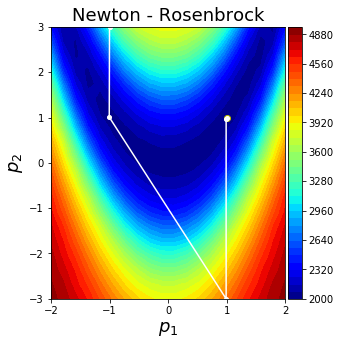

In [11]:
#plot
plt.figure(figsize=(5,5))
plt.plot(1., 1., 'oy')
plt.plot(p1_list, p2_list, '.w-', markersize=8)
plt.title('Newton - Rosenbrock', fontsize=18)
plt.contourf(p1, p2, phi_eq, 40, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.show()

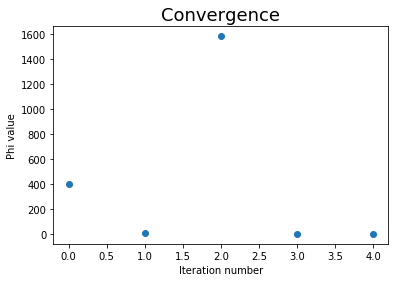

In [12]:
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.ylabel('Phi value')
plt.plot(phi_list, 'o')
plt.show()

# Método de Newton aplicado à ptp

A função a ser minimizada agora é $\mathbf{p}^T\mathbf{p}$:

\begin{equation}
\phi(\mathbf{p}) = \left\| \mathbf{p}^T\mathbf{p} \right\|_2^2 = \mathbf{p}_1^2 + \mathbf{p}_2^2
\end{equation}

# Funções

In [13]:
# calculando a phi
def ptp(p0):
    '''
    Calcula a função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    phi: array 1D - valor da função calculada em cada ponto (p1, p2)
    '''
    phi = p0[0]*p0[0] + p0[1]*p0[1]
    
    return phi

# calculando gradiente de phi
def grad_ptp(p0):
    '''
    Calcula o gradiente da função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    grad: array 1D - vetor gradiente calculado em cada ponto (p1, p2)
    '''
    grad = np.zeros(2)
    grad[0] = 2.*p0[0] 
    grad[1] = 2.*p0[1]

    return grad

# calculando a hessiana de phi
def hessian_ptp(p0):
    '''
    Calcula a Hessiana da função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    Hessiana: array 2D - matriz Hessiana calculada em cada ponto (p1, p2)
    '''
    H = np.zeros((2,2))
    H[0,0] = 2.
    H[1,1] = 2.
    
    return H

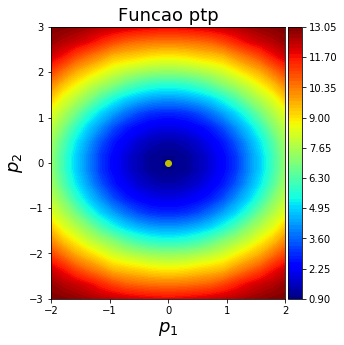

In [16]:
#definindo os parâmetros
p1 = np.linspace(-2., 2., 20)
p2 = np.linspace(-3., 3., 20)

#criando um grid
p1, p2 = np.meshgrid(p1, p2)

# calculando a phi
phi = p1*p1 + p2*p2

# equalizando as cores
phi_eq = histeq(phi)
phi_eq = np.reshape(phi_eq,(20,20))

#plot
plt.figure(figsize=(5,5))
plt.plot(0., 0., 'oy')
plt.title('Funcao ptp', fontsize=18)
plt.contourf(p1, p2, phi_eq, 100, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
#plt.savefig('plot_rosenbrock.png', pad_inches=0.0)
plt.show()

# Chute inicial e parâmetros de entrada

In [19]:
# chute inicial
p01 = -1.
p02 = 3.

# vetor de parâmetros inicial
p0 = np.array([p01,p02]) 

# valor da função no chute inicial
phi0 = rosenbrock(p0)

# armazenando o chute inicial
p1_list = [p01]
p2_list = [p02]
phi_list = [phi0]

# número de iteração máximo
itmax = 100

# critério de parada
epsilon = 1e-2

In [20]:
for i in range(itmax):
    # calculando o valor da função e do gradiente em p0
    grad = grad_ptp(p0)
    H = hessian_ptp(p0)
    
    # calculando p e atualizando para a próxima iteração
    H_inv = np.linalg.inv(H)
    p = p0 - np.dot(H_inv,grad)
    phi = ptp(p)
    
    # armazenando os resultados em listas para o plot
    phi_list.append(phi)
    p1_list.append(p[0])
    p2_list.append(p[1])
    
    # printa os valores
    print 'itreação: %3d   p1: %.2f   p2: %.2f   f: %.2e' % (i, p[0], p[1], phi)
        
    # critério de parada
    if abs(phi - phi0) <= epsilon:
        break
    else:
        # atualizando para a próxima iteração
        p0 = p.copy()
        phi0 = phi

itreação:   0   p1: 0.00   p2: 0.00   f: 0.00e+00
1.0


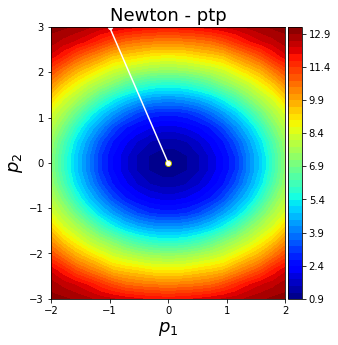

In [22]:
#plot
plt.figure(figsize=(5,5))
plt.plot(0., 0., 'oy')
plt.plot(p1_list, p2_list, '.w-', markersize=8)
plt.title('Newton - ptp', fontsize=18)
plt.contourf(p1, p2, phi_eq, 40, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.show()

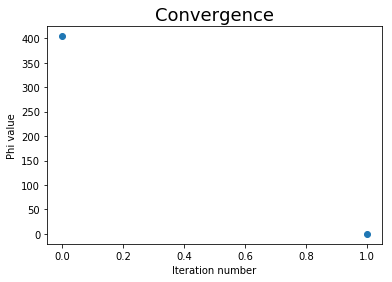

In [23]:
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.ylabel('Phi value')
plt.plot(phi_list, 'o')
plt.savefig('convergence.png', dpi=300)
plt.show()